In [3]:
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def read_fsi():
    csvFile = open("modified_fsi-2017.csv", "r")
    reader = csv.reader(csvFile)
    attr_dic = {}
    score_dic = {}
    attributes = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            attributes = item[4:]
            continue
        attr_dic[item[0]] = [float(i) for i in item[4:]]
        score_dic[item[0]] = float(item[3])
    csvFile.close()
    return attr_dic, score_dic, attributes

In [5]:
def input_fsi():
    attr_dic, score_dic, attributes = read_fsi()
    for (idx, item) in enumerate(attr_dic):
        if idx == 0:
            attr = np.array(attr_dic[item])
        new_attr = np.array(attr_dic[item])
        attr = np.vstack((attr, new_attr))
    for (idx, item) in enumerate(score_dic):
        if idx == 0:
            score = np.array(score_dic[item])
        new_score = np.array(score_dic[item])
        score = np.vstack((score, new_score))
    return attr, score

In [6]:
def read_epi():
    csvFile = open("modified_EPI.csv", "r")
    reader = csv.reader(csvFile)
    attr_dic = {}
    score_dic = {}
    attributes = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            attributes = item[3:10]
            continue
        attr_dic[item[2]] = [float(i) for i in item[3:10]]
        score_dic[item[2]] = float(item[10])
    csvFile.close()
    return attr_dic, score_dic, attributes

In [7]:
def input_epi():
    attr_dic, score_dic, attributes = read_epi()
    for (idx, item) in enumerate(attr_dic):
        if idx == 0:
            attr = np.array(attr_dic[item])
        new_attr = np.array(attr_dic[item])
        attr = np.vstack((attr, new_attr))
    for (idx, item) in enumerate(score_dic):
        if idx == 0:
            score = np.array(score_dic[item])
        new_score = np.array(score_dic[item])
        score = np.vstack((score, new_score))
    return attr, score

In [8]:
attr, score = input_epi()

In [9]:
def share_country():
    '''
    Find shared countries of FSI and EPI data.
    Return:
        FSI_data -- FSI data sorted according to countries.
        EPI_data -- EPI data sorted according to countries.
    Note that these two dictionaries have the same number of countries.
    And they also have the aligned attributes based on countries order.
    '''
    fsi_attrdic, fsi_scoredic, fsi_attributes = read_fsi()
    epi_attrdic, epi_scoredic, epi_attributes = read_epi()
    share_key = []
    cnt = 0
    # First, delete all keys and values in fsi but not in epi
    for (idx, item) in enumerate(fsi_attrdic):
        epi_key = list(epi_attrdic.keys())
        if item in epi_key:
            if cnt == 0:
                fsi_attr = np.array(fsi_attrdic[item]).reshape(1,-1)
                fsi_score = np.array(fsi_scoredic[item])
                share_key.append(item)
            else:
                share_key.append(item)
                fsi_attr = np.vstack((fsi_attr, fsi_attrdic[item]))
                fsi_score = np.vstack((fsi_score, fsi_scoredic[item]))
            cnt += 1
    cnt = 0
    # Second, delete all keys and values in epi but not in fsi
    for (idx, item) in enumerate(epi_attrdic):
        fsi_key = list(fsi_attrdic.keys())
        if item in fsi_key:
            if cnt == 0:
                epi_attr = np.array(epi_attrdic[item]).reshape(1,-1)
                epi_score = np.array(epi_scoredic[item])
            else:
                epi_attr = np.vstack((epi_attr, epi_attrdic[item]))
                epi_score = np.vstack((epi_score, epi_scoredic[item]))
            cnt += 1
    df = pd.DataFrame(data = {'country': share_key,
                              'FSI': fsi_score.ravel(),
                              'EPI': epi_score.ravel(),
                              fsi_attributes[0]: fsi_attr[:,0].ravel(),
                              fsi_attributes[1]: fsi_attr[:,1].ravel(), 
                              fsi_attributes[2]: fsi_attr[:,2].ravel(),
                              fsi_attributes[3]: fsi_attr[:,3].ravel(), 
                              fsi_attributes[4]: fsi_attr[:,4].ravel(),
                              fsi_attributes[5]: fsi_attr[:,5].ravel(), 
                              fsi_attributes[6]: fsi_attr[:,6].ravel(),
                              fsi_attributes[7]: fsi_attr[:,7].ravel(), 
                              fsi_attributes[8]: fsi_attr[:,8].ravel(),
                              fsi_attributes[9]: fsi_attr[:,9].ravel(),
                              fsi_attributes[10]: fsi_attr[:,10].ravel(), 
                              fsi_attributes[11]: fsi_attr[:,11].ravel(),
                              epi_attributes[0]: epi_attr[:,0].ravel(),
                              epi_attributes[1]: epi_attr[:,1].ravel(), 
                              epi_attributes[2]: epi_attr[:,2].ravel(),
                              epi_attributes[3]: epi_attr[:,3].ravel(), 
                              epi_attributes[4]: epi_attr[:,4].ravel(),
                              epi_attributes[5]: epi_attr[:,5].ravel(), 
                              epi_attributes[6]: epi_attr[:,6].ravel()})
    df.to_csv('share_data1.csv')
    return share_key, fsi_attr, epi_attr

In [10]:
country, fsi_attr, epi_attr = share_country()

In [11]:
def input_result():
    csvFile = open("share_data.csv", "r")
    reader = csv.reader(csvFile)
    fsi_dic = {}
    epi_dic = {}
    fsi = []
    epi = []
    for item in reader:
        # ignore the first line
        if reader.line_num == 1:
            continue
        fsi_dic[item[1]] = float(item[2])
        epi_dic[item[1]] = float(item[3])
        fsi.append(float(item[2]))
        epi.append(float(item[3]))
    csvFile.close()
    return fsi, epi

In [12]:
fsi, epi = input_result()

In [13]:
plt.scatter(fsi, epi)

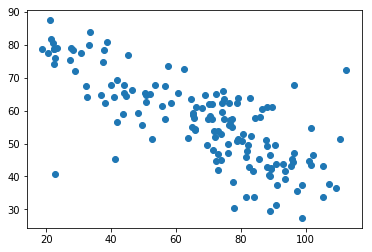

In [14]:
plt.show()

In [15]:
from sklearn.cluster import KMeans

In [16]:
def cluster(data, n_clusters):
    '''
    Cluster data into n_clusters categories.
    Input:
        data -- The input data to be clustered.
        n_clusters -- The number of categories to be clustered.
    Return:
        label_pred -- The category array corresponding to every data.
    '''
    estimator = KMeans(n_clusters = n_clusters)
    estimator.fit(data)
    label_pred = estimator.labels_
    print(label_pred)
    return label_pred

In [17]:
FSI_data = np.array([fsi]).reshape([-1,1])
EPI_data = np.array([epi]).reshape([-1,1])
#FSI_label = cluster(FSI_data, 2)
#EPI_label = cluster(EPI_data, 2)
FSI_label = FSI_data > 80
EPI_label = EPI_data < 50

In [18]:
#FSI_label = 1-FSI_label

In [19]:
plt.scatter(FSI_data[FSI_label == 1], EPI_data[FSI_label == 1], c = 'r')
plt.scatter(FSI_data[FSI_label == 0], EPI_data[FSI_label == 0], c = 'b')

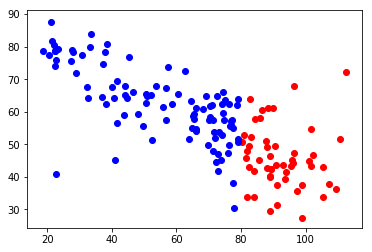

In [20]:
plt.show()

In [21]:
plt.scatter(FSI_data[EPI_label == 1], EPI_data[EPI_label == 1], c = 'r')
plt.scatter(FSI_data[EPI_label == 0], EPI_data[EPI_label == 0], c = 'b')

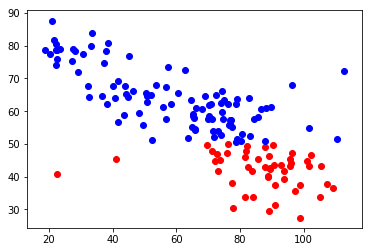

In [22]:
plt.show()

In [23]:
def find_bound(data, label, mode = 1):
    '''
    Find the boundary of clusters.
    Input:
        data -- The input data to be clustered.
        label -- The label corresponding to the input data.
        mode -- mode = 1 means we need to find the minimum bound of data with label = 1 while maximum bound for label = 0.
                mode = 0 means we need to find the maximum bound of data with label = 0 while maximum bound for label = 1.
    Return:
        bound -- The boundary of 1-dim cluster.
    '''
    if mode:
        label1_min = min(data[label == 1])
        label0_max = max(data[label == 0])
        bound = (label1_min+label0_max)/2
    else:
        label1_max = max(data[label == 1])
        label0_min = min(data[label == 0])
        bound = (label1_max+label0_min)/2
    return bound

In [24]:
FSI_bound = find_bound(FSI_data, FSI_label)
EPI_bound = find_bound(EPI_data, EPI_label)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 1)], EPI_data[(FSI_label == 1) & (EPI_label == 1)], c = 'r')
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 0)], EPI_data[(FSI_label == 1) & (EPI_label == 0)], c = 'b')
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 1)], EPI_data[(FSI_label == 0) & (EPI_label == 1)], c = 'm')
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 0)], EPI_data[(FSI_label == 0) & (EPI_label == 0)], c = 'y')
FSI_bound_y = np.linspace(min(EPI_data), max(EPI_data), 1000)
FSI_bound_x = np.full(FSI_bound_y.shape, FSI_bound)
EPI_bound_x = np.linspace(min(FSI_data), max(FSI_data), 1000)
EPI_bound_y = np.full(EPI_bound_x.shape, EPI_bound)
plt.plot(FSI_bound_x, FSI_bound_y, c = 'k')
plt.plot(EPI_bound_x, EPI_bound_y, c = 'k')
plt.xlabel('FSI')
plt.ylabel('EPI')

Text(0,0.5,'EPI')

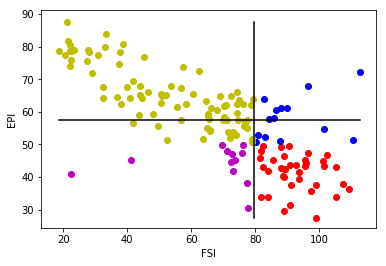

In [25]:
plt.show()

In [26]:
def logistic_util(X, Y, test_size, random_state):
    '''
    Implement logistic regression with sklearn.
    Input:
        X -- The independent variables set.
        Y -- The dependent variable/target set.
        test_size -- Test size of the whole set.
        random_state -- Param for train_test_split.
    Output:
        lr -- Logistic Regression Result.
    '''
    #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)
    #Y_train, Y_test = Y_train.ravel(), Y_test.ravel()
    #print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)
    # Normalize the data
    X_train=X
    Y_train=Y.flatten()
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = np.array(list(sc.transform(X_train)))
    #X_test_std = np.array(list(sc.transform(X_test)))
    # Combine the train and test data
    #X_combined_std = np.vstack((X_train_std, X_test_std))
    #Y_combined = np.hstack((Y_train, Y_test))
    # Implement logistic regression
    lr = LogisticRegression(C = 0.01, random_state = 0)
    lr.fit(X_train_std, Y_train)
    #print(lr.predict_proba(X_test_std[2,:].reshape(1,-1))[0,0], Y_test[2])
    #scores = cross_val_score(lr, X_combined_std, Y_combined, cv = 5, scoring = 'accuracy')
    #print(scores)
    return lr,X_train_std, Y# X_combined_std, Y_combined
    '''
    plot_decision_regions(X_combined_std, Y_combined, clf = lr, res = 0.02)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.legend(loc = 'upper left')
    plt.show()
    '''

In [27]:
from sklearn.cross_validation import cross_val_score

C:\Users\rhythmswing\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
lr1, fsi_attr_std, _ = logistic_util(fsi_attr, EPI_label, 0.1, 0)
probE0_H = lr1.predict_proba(fsi_attr_std)[:,0]
probE1_H = np.ones(probE0_H.shape)-probE0_H

In [29]:
lr2, fsi_attr_std, _ = logistic_util(fsi_attr, (EPI_label == 0) & (FSI_label == 1), 0.1, 0)
prob_other = lr2.predict_proba(fsi_attr_std)[:,0]
probE0F1_H = np.ones(prob_other.shape)-prob_other

In [30]:
lr3, fsi_attr_std, _ = logistic_util(fsi_attr, (EPI_label == 1) & (FSI_label == 1), 0.1, 0)
prob_other = lr3.predict_proba(fsi_attr_std)[:,0]
probE1F1_H = np.ones(prob_other.shape)-prob_other

In [31]:
probF1_E0H = probE0F1_H / probE0_H
probF1_E1H = probE1F1_H / probE1_H
print(probF1_E0H.shape, probF1_E1H.shape)

(148,) (148,)


In [32]:
fragile_value = []
for i in range(len(fsi_attr_std)):
    if EPI_label[i] == 1:
        fragile_value.append(probF1_E1H[i])
    else:
        fragile_value.append(probF1_E0H[i])
print(fragile_value[129], EPI_label[129], probF1_E1H[129])

0.312127275482 [False] 0.888897051004


In [33]:
fragile_value = np.array(fragile_value).reshape(-1,1)
sc = StandardScaler()
sc.fit(np.log(fragile_value))
fragile_std = (255*(np.array(list(sc.transform(fragile_value)))+1)/2).astype(np.uint8)
fragile_std = fragile_std.reshape(len(fragile_std))

In [34]:
import seaborn as sn
pal = np.array(sn.color_palette("Blues", 155))
sorted_idx = sorted(range(len(fragile_value)), key=lambda k: fragile_value[k])
color = pal[sorted_idx]

In [35]:
FSI_bound = find_bound(FSI_data, FSI_label)
EPI_bound = find_bound(EPI_data, EPI_label)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 1)], EPI_data[(FSI_label == 1) & (EPI_label == 1)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 1) & (EPI_label == 0)], EPI_data[(FSI_label == 1) & (EPI_label == 0)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 1)], EPI_data[(FSI_label == 0) & (EPI_label == 1)], c = color, cmap = plt.cm.Blues)
plt.scatter(FSI_data[(FSI_label == 0) & (EPI_label == 0)], EPI_data[(FSI_label == 0) & (EPI_label == 0)], c = color, cmap = plt.cm.Blues)
FSI_bound_y = np.linspace(min(EPI_data), max(EPI_data), 1000)
FSI_bound_x = np.full(FSI_bound_y.shape, FSI_bound)
EPI_bound_x = np.linspace(min(FSI_data), max(FSI_data), 1000)
EPI_bound_y = np.full(EPI_bound_x.shape, EPI_bound)
plt.plot(FSI_bound_x, FSI_bound_y, c = 'k')
plt.plot(EPI_bound_x, EPI_bound_y, c = 'k')
plt.xlabel('FSI')
plt.ylabel('EPI')

Text(0,0.5,'EPI')

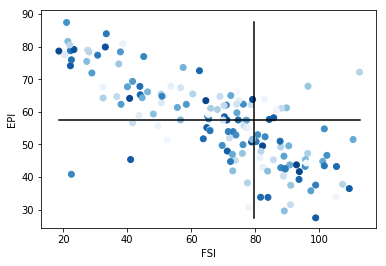

In [36]:
plt.show()

In [37]:
country = np.array(country)
print(country.shape)
print(country[fragile_value.reshape(len(country)) > 1.0])

(148,)
['Central African Republic' "Cote d'Ivoire" 'Egypt' 'Guatemala' 'Lebanon'
 'Nigeria' 'Philippines' 'Sri Lanka' 'Sudan' 'Tanzania' 'Zambia']


In [38]:
df_fragile = pd.DataFrame(data={'country':country,'fragility':fragile_value.flatten()})

In [42]:
df_fragile['FSI']=FSI_data.flatten()
df_fragile['EPI']=EPI_data.flatten()
df_fragile['fragility_log']=np.log(1+df_fragile.fragility)

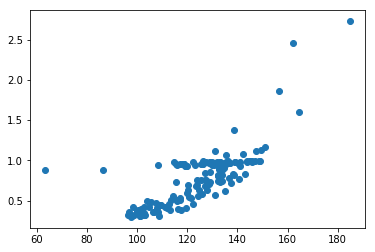

In [43]:
plt.scatter(df_fragile.EPI+df_fragile.FSI,df_fragile.fragility)
plt.show()

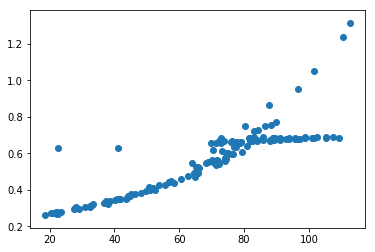

In [44]:
plt.scatter(df_fragile.FSI, (df_fragile.fragility_log))
plt.show()

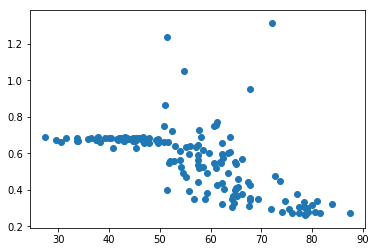

In [45]:
plt.scatter(df_fragile.EPI, (df_fragile.fragility_log))
plt.show()

In [46]:
df_fragile

,country,fragility,FSI,EPI,fragility_log
0,Afghanistan,0.989551,107.3,37.74,0.687909
1,Albania,0.586099,60.5,65.46,0.461278
2,Algeria,0.883318,76.8,57.18,0.633035
3,Angola,0.964826,91.1,37.44,0.675404
4,Argentina,0.463124,48.2,59.30,0.380574
5,Armenia,0.729100,71.0,62.07,0.547601
6,Australia,0.319031,22.3,74.12,0.276897
7,Austria,0.353223,27.7,78.97,0.302489
8,Azerbaijan,0.816384,76.3,62.33,0.596848
9,Bahrain,0.597213,64.9,55.15,0.468260


In [47]:
def reverse_num(FSI_data, EPI_data, fragile):
    cnt = 0
    rate = []
    for i in range(len(FSI_data)):
        mask = (EPI_data > EPI_data[i]+5) & (FSI_data+1 < FSI_data[i]) & (fragile > fragile[i])
        rate.append(1.0*sum(mask)/(len(FSI_data)-1))
    avg_rate = np.mean(rate)
    print(avg_rate)

In [48]:
reverse_num(df_fragile.FSI,df_fragile.EPI,df_fragile.fragility)

0.0147545504688


In [49]:
(df_fragile.FSI>80).sum()

51

In [50]:
(df_fragile.EPI<50).sum()

49

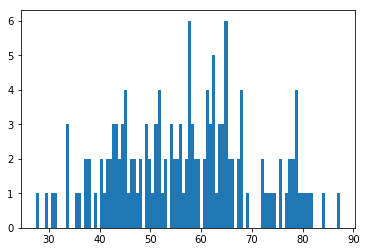

In [54]:
plt.hist(EPI_data,100)
plt.show()

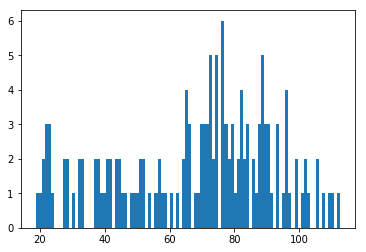

In [55]:
plt.hist(FSI_data,100)
plt.show()

In [69]:
cn_clean = pd.read_csv('epi_historical.csv',encoding='utf-8')
years = np.arange(1997,2018,1)
cn_clean['years']=years

In [70]:
cn_clean

,"Agriculture, value added (% of GDP)",GDP (current US$),GDP per capita (current US$),GDP per capita growth (annual %),GDP growth (annual %),"GDP, PPP (current international $)","GDP per capita, PPP (current international $)","Industry, value added (% of GDP)","Services, etc., value added (% of GDP)","Services, etc., value added (annual % growth)","Industry, value added (annual % growth)","Agriculture, value added (annual % growth)",EPI,CCE,years
0,17.895277,9.616040e+11,781.744164,8.118548,9.230769,2.801140e+12,2277.206851,47.100259,35.004464,10.438820,10.470369,3.429971,6.096559,-3.087120,1997
1,17.159035,1.029040e+12,828.580479,6.807806,7.837614,3.053460e+12,2458.630661,45.798809,37.042156,8.394359,8.912677,3.434662,6.073147,-3.095449,1998
2,16.064788,1.094000e+12,873.287062,6.739270,7.667486,3.337890e+12,2664.485031,45.361028,38.574184,9.258101,8.194368,2.748092,6.063112,-3.109263,1999
3,14.676242,1.211350e+12,959.372484,7.640002,8.491508,3.703740e+12,2933.314817,45.537279,39.786480,9.767548,9.482495,2.303120,6.049667,-3.117060,2000
4,13.983461,1.339400e+12,1053.108243,7.555802,8.339911,4.104070e+12,3226.848456,44.794571,41.221968,10.264970,8.484057,2.650690,6.042956,-3.122740,2001
5,13.301488,1.470550e+12,1148.508290,8.401915,9.130646,4.547550e+12,3551.663652,44.451717,42.246796,10.482498,9.900309,2.688362,6.082633,-3.127682,2002
6,12.348999,1.660290e+12,1288.643252,9.352364,10.035603,5.103710e+12,3961.273893,45.623964,42.027037,9.539305,12.668126,2.376852,6.125395,-3.126576,2003
7,12.916648,1.955350e+12,1508.668098,9.459175,10.111223,5.774280e+12,4455.205022,45.901402,41.181950,10.123515,11.139645,6.123822,6.129292,-3.124252,2004
8,11.641496,2.285970e+12,1753.417829,10.742552,11.395776,6.639270e+12,5092.559837,47.023771,41.334733,12.358912,12.133891,5.072923,6.069582,-3.127133,2005
9,10.625761,2.752130e+12,2099.229435,12.091836,12.719479,7.713670e+12,5883.719377,47.558567,41.815673,14.133182,13.449543,4.737477,6.038891,-3.134563,2006
